In [1]:
#Import all the libraries need for the case study
import pandas as pd #to read the data in dataframes
import numpy as np #Library needed for mathematics computation
import matplotlib.pyplot as plt # For Data Visualisation
import seaborn as sns # Useful for data visualisation
%matplotlib inline

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading csv file and display few rows to see the data set
#low_memory is set False to overcome a warning message
bike_df = pd.read_csv('day.csv',header=0,low_memory=False)
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
#Checking out the information of the bike sharing data set
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
#Let us see how the data set looks like
bike_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


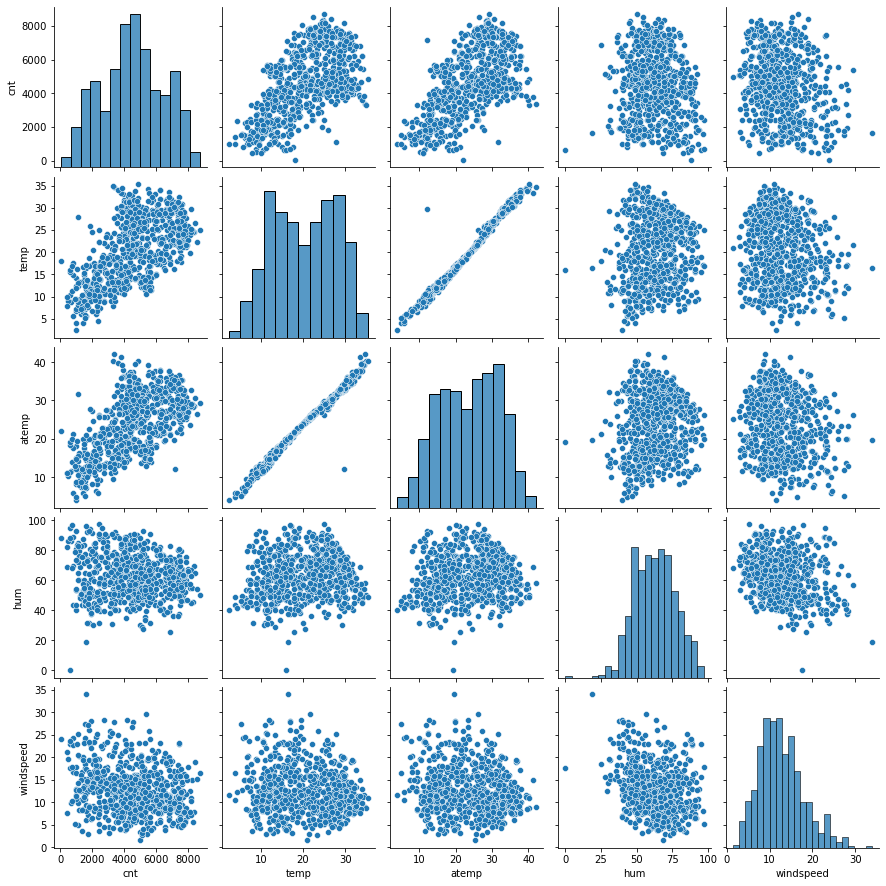

In [6]:
#Let us pairplot for numeric variables
sns.pairplot(bike_df[['cnt','temp','atemp','hum','windspeed']])
plt.show()

In [7]:
# Defining the map for the season
def season_map(x):
    return x.map({1:'spring', 2: 'summer', 3:'fall',4:'winter'})
# Applying the function to the bike dataframe
bike_df['season'] = bike_df[['season']].apply(season_map)

In [8]:
# Defining the map for the weathersit
def weather_map(x):
    return x.map({1:'Clear Day', 2: 'Misty Day', 3:'Rainy Day',4:'Snowy Day'})
# Applying the function to the bike dataframe
bike_df['weathersit'] = bike_df[['weathersit']].apply(weather_map)

In [9]:
# Filling month categorical variable
def month_map(x):
    return x.map({1:'Jan', 2:'Feb', 3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
# Applying the function to the bike dataframe
bike_df['mnth'] = bike_df[['mnth']].apply(month_map)

In [10]:
# Filling weekday categorical variable
def week_map(x):
    return x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
# Applying the function to the bike dataframe
bike_df['weekday'] = bike_df[['weekday']].apply(week_map)

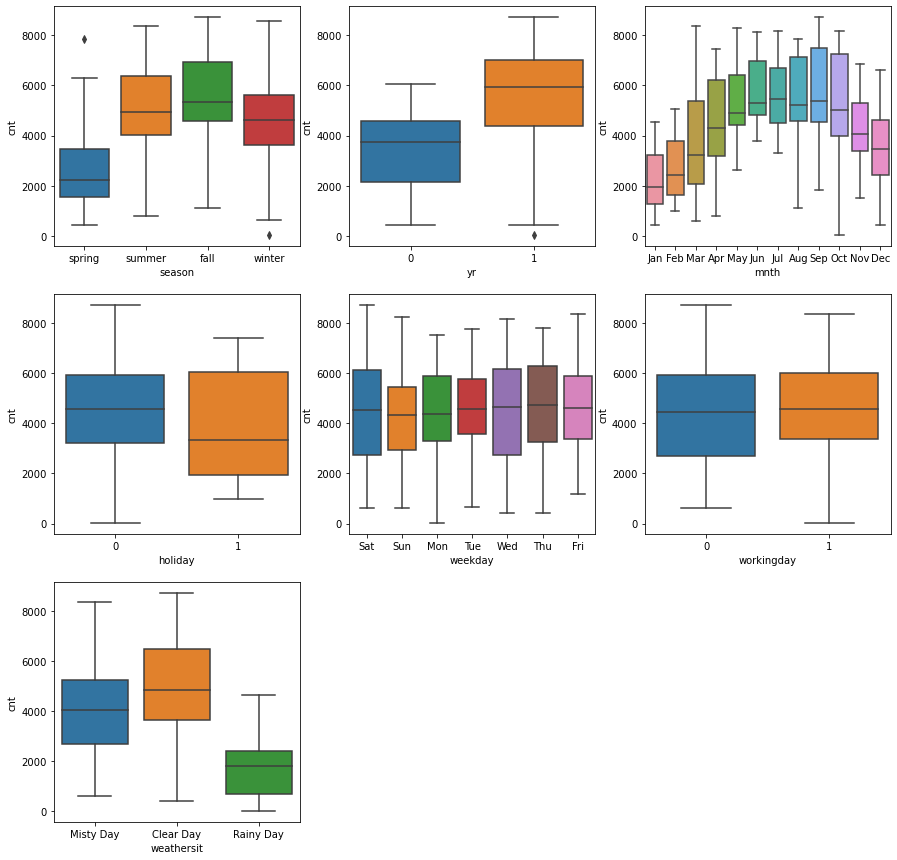

In [11]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(15, 15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bike_df, x=i[1], y='cnt')
plt.show()

In [12]:
#Inference:
#Here many insights can be drawn from the plots

#1. Season: 3:fall has highest demand for rental bikes
#2. I see that demand for next year has grown
#3. Demand is continuously growing each month till June. September month has highest demand. After September, demand is decreasing
#4. When there is a holiday, demand has decreased.
#5. Weekday is not giving clear picture abount demand.
#6. The clear weathershit has highest demand
#7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to extereme weather conditions.

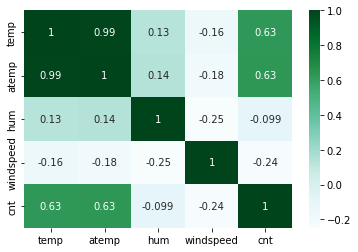

In [13]:
# Checking continuous variables relationship with each other
sns.heatmap(bike_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

In [14]:
#temp and atemp has correlation more than .99 , SO WE SHOULD DROP THE atemp column

In [15]:
bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,Jan,0,Sat,0,Misty Day,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,Jan,0,Sun,0,Misty Day,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,Jan,0,Mon,1,Clear Day,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,Jan,0,Tue,1,Clear Day,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,Jan,0,Wed,1,Clear Day,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [16]:
bike_df.drop(['instant'], axis = 1, inplace = True)

In [17]:
bike_df.drop(['dteday'], axis = 1, inplace = True)

In [18]:
bike_df.drop(['atemp'], axis = 1, inplace = True)

In [19]:
bike_df.drop(['casual','registered'], axis = 1, inplace = True)

In [20]:
bike_df.corr()

,yr,holiday,workingday,temp,hum,windspeed,cnt
yr,1.000000,0.008195,-0.002945,0.048789,-0.112547,-0.011624,0.569728
holiday,0.008195,1.000000,-0.252948,-0.028764,-0.015662,0.006257,-0.068764
workingday,-0.002945,-0.252948,1.000000,0.053470,0.023202,-0.018666,0.062542
temp,0.048789,-0.028764,0.053470,1.000000,0.128565,-0.158186,0.627044
hum,-0.112547,-0.015662,0.023202,0.128565,1.000000,-0.248506,-0.098543
windspeed,-0.011624,0.006257,-0.018666,-0.158186,-0.248506,1.000000,-0.235132
cnt,0.569728,-0.068764,0.062542,0.627044,-0.098543,-0.235132,1.000000


In [21]:
bike_df.shape

(730, 11)

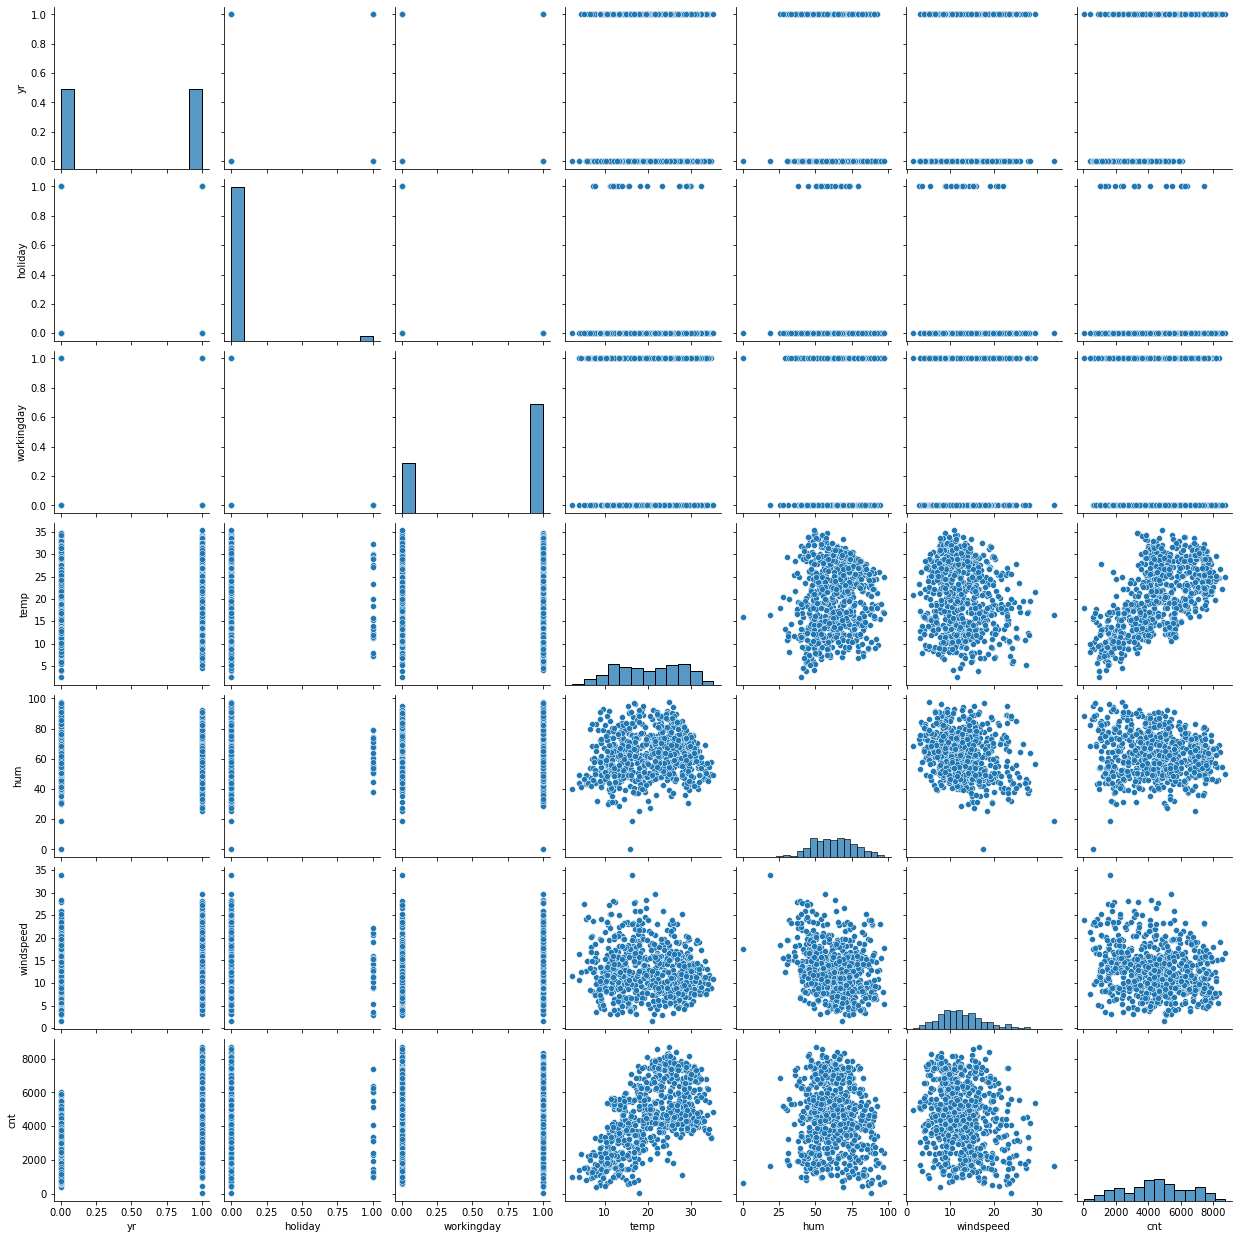

In [22]:
sns.pairplot(bike_df)
plt.show()

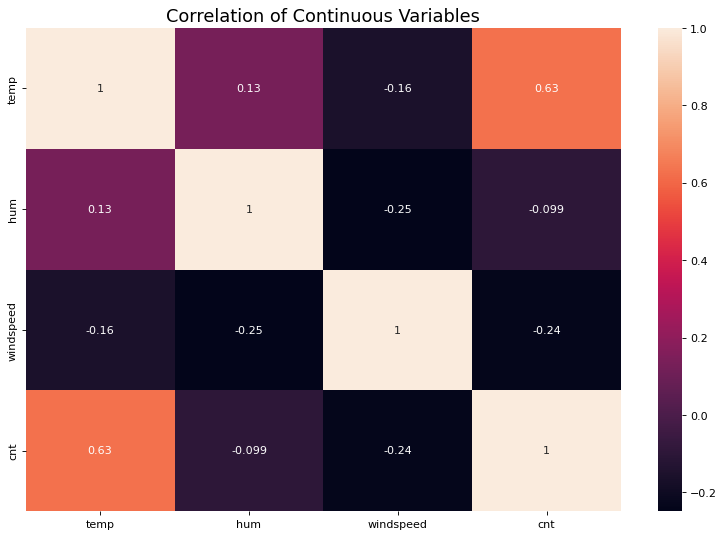

In [23]:
cont_var = ["temp","hum","windspeed","cnt"]
plt.figure(figsize=(12,8),dpi=80)
plt.title("Correlation of Continuous Variables",fontsize=16)
sns.heatmap(bike_df[cont_var].corr(),annot= True)
plt.show()

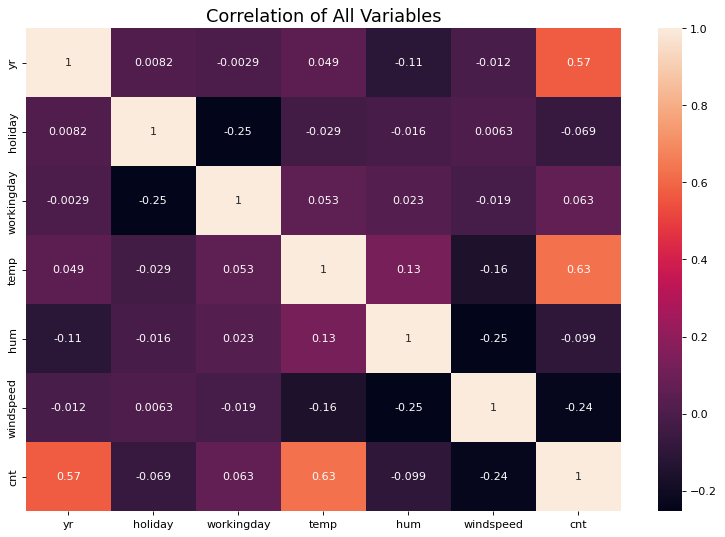

In [24]:
plt.figure(figsize=(12,8),dpi=80)
plt.title("Correlation of All Variables",fontsize=16)
sns.heatmap(bike_df.corr(),annot= True)
plt.show()

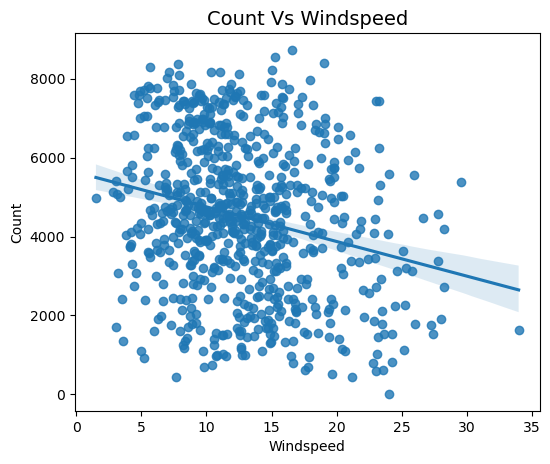

In [25]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Count Vs Windspeed",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="windspeed")
plt.xlabel("Windspeed")
plt.ylabel("Count")
plt.show()

In [26]:
#Inference:
#Windspeed is values are more scattered around.
#Although we can see cnt decreasing with increase in windspeed.

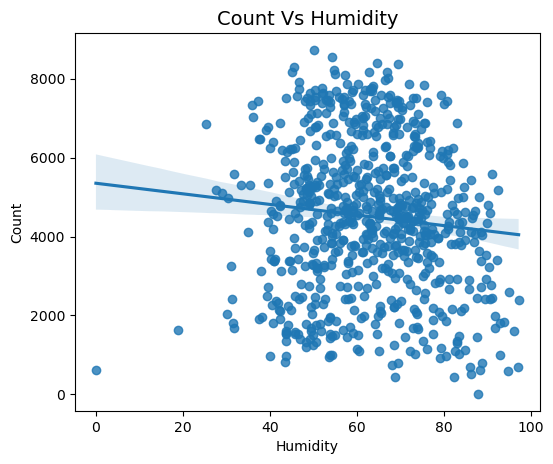

In [27]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Count Vs Humidity",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.ylabel("Count")
plt.show()

In [28]:
#Inference:
#Hum is values are more scattered around.
#Although we can see cnt decreasing with increase in humidity.

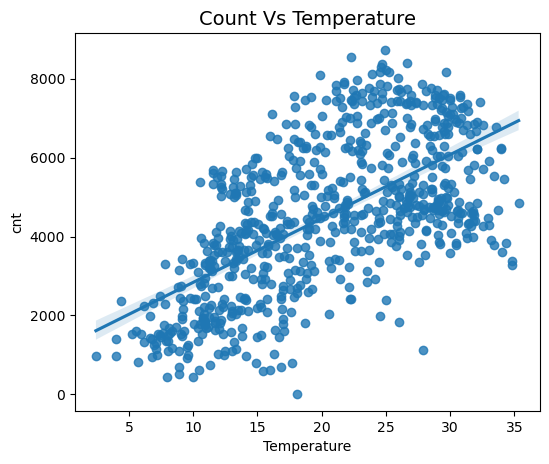

In [29]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Count Vs Temperature",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

In [30]:
#Inference:
#Demand for bikes is positively correlated to temp.
#We can see that cnt is linearly increasing with temp indicating linear relation.

In [31]:
bike_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,0,Sat,0,Misty Day,14.110847,80.5833,10.749882,985
1,spring,0,Jan,0,Sun,0,Misty Day,14.902598,69.6087,16.652113,801
2,spring,0,Jan,0,Mon,1,Clear Day,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,0,Tue,1,Clear Day,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,0,Wed,1,Clear Day,9.305237,43.6957,12.522300,1600


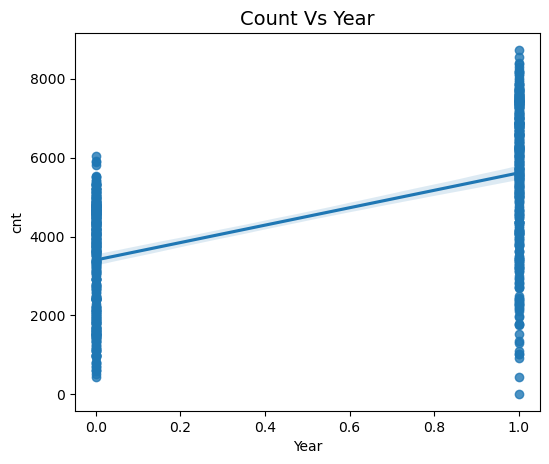

In [32]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Count Vs Year",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="yr")
plt.xlabel("Year")
plt.show()

In [33]:
#Inference:
#Demand for bikes is positively correlated to Year.
#We can see that cnt is increasing with increasing in year, I see that demand for next year has grown

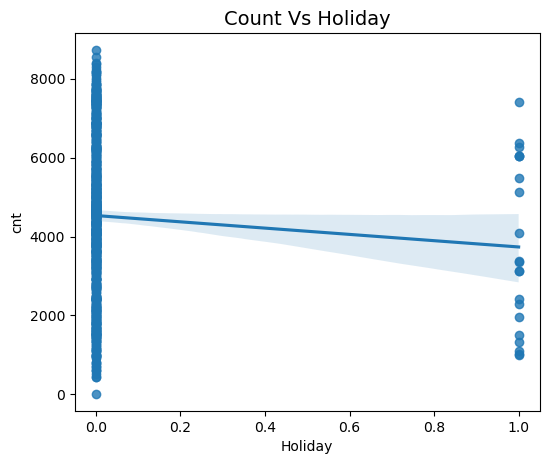

In [34]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Count Vs Holiday",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="holiday")
plt.xlabel("Holiday")
plt.show()

In [35]:
#Inference:
#Demand for bikes is Negatively correlated to Holiday.
#When there is a holiday, demand has decreased

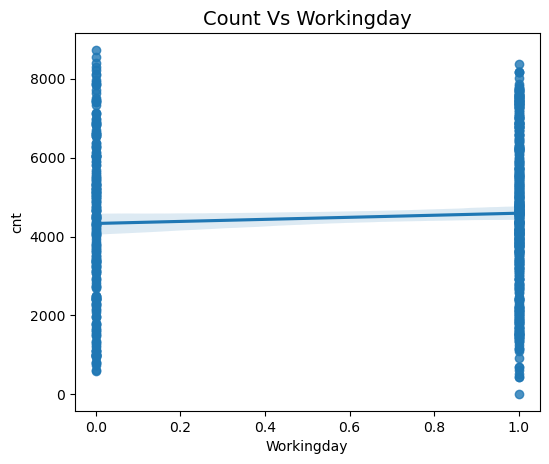

In [36]:
plt.figure(figsize=(6,5),dpi=100)
plt.title("Count Vs Workingday",fontsize=14)
sns.regplot(data=bike_df,y="cnt",x="workingday")
plt.xlabel("Workingday")
plt.show()

### Inference:Working day is not giving clear picture about demand

In [37]:
#Get the dummies for categorical variable and drop the first data for (p-1) dummy variable.
bike_df = pd.get_dummies(data=bike_df, columns=['mnth','season','weekday'],drop_first = True)
#Dont drop the weather condition dummy variable.
bike_df = pd.get_dummies(data=bike_df, columns=['weathersit'])

In [38]:
bike_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Day,weathersit_Misty Day,weathersit_Rainy Day
0,0,0,0,14.110847,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,0,0,0,14.902598,69.6087,16.652113,801,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,43.7273,16.636703,1349,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,1,9.305237,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [39]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   yr                    730 non-null    int64  
 1   holiday               730 non-null    int64  
 2   workingday            730 non-null    int64  
 3   temp                  730 non-null    float64
 4   hum                   730 non-null    float64
 5   windspeed             730 non-null    float64
 6   cnt                   730 non-null    int64  
 7   mnth_Aug              730 non-null    uint8  
 8   mnth_Dec              730 non-null    uint8  
 9   mnth_Feb              730 non-null    uint8  
 10  mnth_Jan              730 non-null    uint8  
 11  mnth_Jul              730 non-null    uint8  
 12  mnth_Jun              730 non-null    uint8  
 13  mnth_Mar              730 non-null    uint8  
 14  mnth_May              730 non-null    uint8  
 15  mnth_Nov              7

### Model Building

In [40]:
bike_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sep',
       'season_spring', 'season_summer', 'season_winter', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear Day', 'weathersit_Misty Day',
       'weathersit_Rainy Day'],
      dtype='object')

In [41]:
bike_df.shape

(730, 30)

In [42]:
from sklearn.model_selection import train_test_split
np.random.seed(0)
bikedf_train, bikedf_test = train_test_split(bike_df, train_size=0.7,test_size=0.3,random_state=200)

In [43]:
print(bikedf_train.shape)
print(bikedf_test.shape)

(510, 30)
(219, 30)


In [44]:
# Importing required library
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [45]:
scaler = MinMaxScaler()

In [46]:
cont_var = ["temp","hum","windspeed","cnt"]
bikedf_train[cont_var] = scaler.fit_transform(bikedf_train[cont_var])

In [47]:
bikedf_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,mnth_Aug,mnth_Dec,mnth_Feb,...,season_winter,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear Day,weathersit_Misty Day,weathersit_Rainy Day
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.488235,0.033333,0.686275,0.555129,0.649374,0.350547,0.489265,0.074510,0.086275,0.074510,...,0.247059,0.152941,0.145098,0.135294,0.139216,0.154902,0.129412,0.641176,0.337255,0.021569
std,0.500352,0.179682,0.464462,0.232861,0.146392,0.162339,0.233589,0.262857,0.281045,0.262857,...,0.431725,0.360284,0.352545,0.342373,0.346511,0.362166,0.335985,0.480126,0.473237,0.145413
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353506,0.542353,0.234958,0.325456,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.560983,0.647488,0.330767,0.494265,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.763381,0.756118,0.438134,0.655952,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


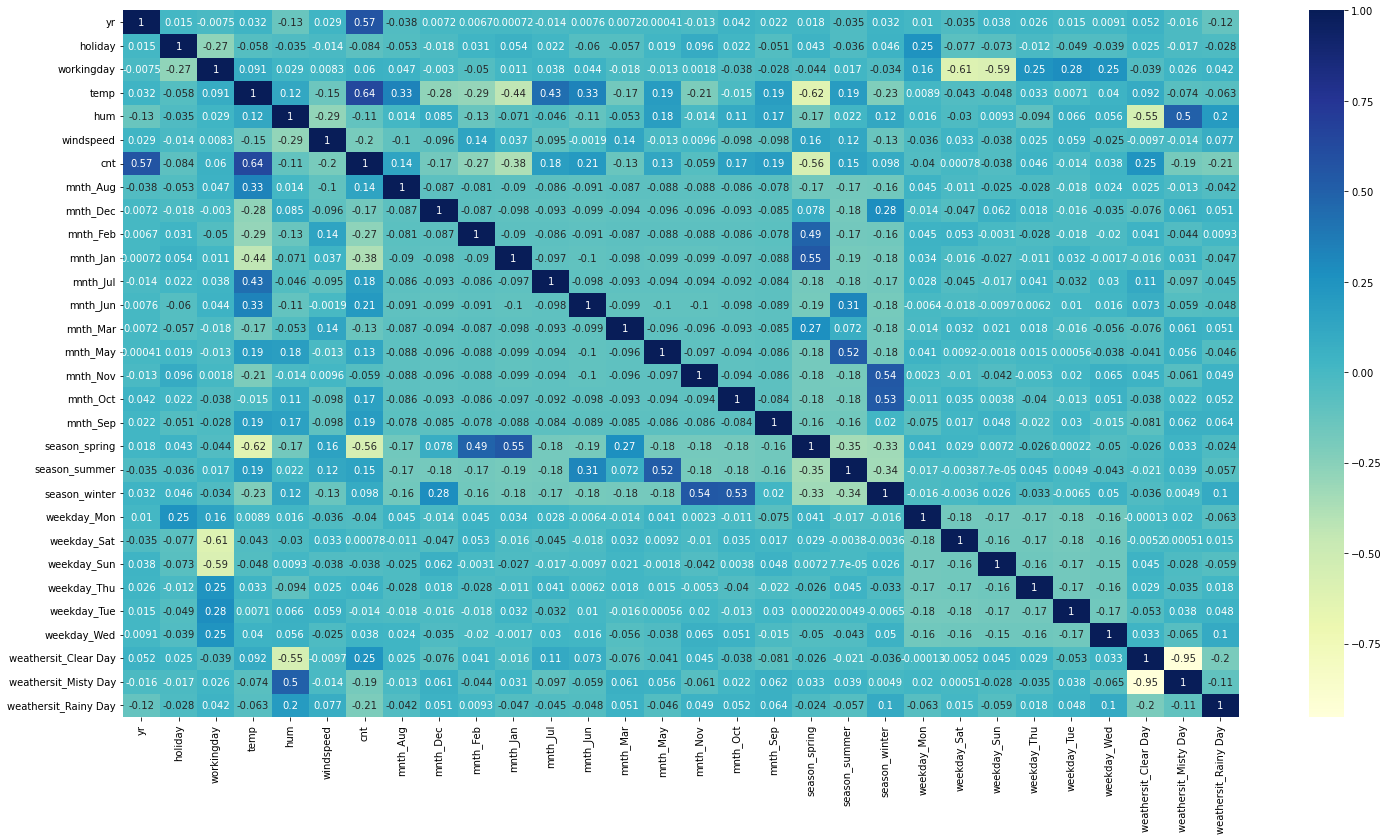

In [48]:
plt.figure(figsize=(25,13))
sns.heatmap(bikedf_train.corr(),annot= True,cmap="YlGnBu")
plt.show()

In [49]:
y_train = bikedf_train.pop('cnt')

In [50]:
X_train = bikedf_train

In [51]:
import statsmodels.api as sm

In [52]:
#Build a Linear regression model using SKLearn for RFE
lm1 = LinearRegression()
lm1.fit(X_train, y_train)

rfe = RFE(lm1, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [53]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('mnth_Aug', False, 15),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', False, 5),
 ('mnth_Jun', False, 14),
 ('mnth_Mar', False, 9),
 ('mnth_May', False, 8),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 13),
 ('mnth_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 11),
 ('weekday_Tue', False, 10),
 ('weekday_Wed', False, 12),
 ('weathersit_Clear Day', True, 1),
 ('weathersit_Misty Day', False, 4),
 ('weathersit_Rainy Day', True, 1)]

In [54]:
rank_col = X_train.columns[rfe.support_]
print(rank_col)

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Nov', 'mnth_Sep', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Clear Day', 'weathersit_Rainy Day'],
      dtype='object')


In [55]:
X_train.columns[~rfe.support_]

Index(['workingday', 'mnth_Aug', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Misty Day'],
      dtype='object')

In [56]:
X_train.shape

(510, 29)

In [57]:
X_train_rfe = X_train[rank_col]

In [58]:
X_train_rfe.shape

(510, 15)

In [59]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [60]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

In [61]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.99e-194
Time:                        16:35:59   Log-Likelihood:                 507.17
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     494   BIC:                            -914.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2514 

In [62]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,106.78
11,season_spring,5.80
3,temp,4.23
13,season_winter,3.48
12,season_summer,2.41
8,mnth_Jan,2.39
7,mnth_Feb,1.99
4,hum,1.84
9,mnth_Nov,1.83
6,mnth_Dec,1.64


In [63]:
X_train_new = X_train_rfe.drop(["const"], axis = 1)

In [64]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [65]:
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [66]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.9
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.99e-194
Time:                        16:35:59   Log-Likelihood:                 507.17
No. Observations:                 510   AIC:                            -982.3
Df Residuals:                     494   BIC:                            -914.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.2514 

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,hum,23.30
2,temp,18.93
10,season_spring,6.04
4,windspeed,5.69
12,season_winter,3.86
13,weathersit_Clear Day,3.55
11,season_summer,2.75
7,mnth_Jan,2.53
6,mnth_Feb,2.13
0,yr,2.04


In [68]:
X_train_new = X_train_new.drop(["hum"], axis = 1)

In [69]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [70]:
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [71]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.6
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          1.76e-189
Time:                        16:36:00   Log-Likelihood:                 492.61
No. Observations:                 510   AIC:                            -955.2
Df Residuals:                     495   BIC:                            -891.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.1117 

In [72]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,5.66
2,temp,5.15
9,season_spring,4.54
12,weathersit_Clear Day,2.94
11,season_winter,2.73
6,mnth_Jan,2.34
5,mnth_Feb,2.08
0,yr,2.02
10,season_summer,1.99
7,mnth_Nov,1.86


In [73]:
X_train_new = X_train_new.drop(["windspeed"], axis = 1)

In [74]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [75]:
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [76]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.7
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          3.19e-185
Time:                        16:36:00   Log-Likelihood:                 479.71
No. Observations:                 510   AIC:                            -931.4
Df Residuals:                     496   BIC:                            -872.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0584 

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,season_spring,3.96
2,temp,3.92
11,weathersit_Clear Day,2.93
10,season_winter,2.63
5,mnth_Jan,2.33
4,mnth_Feb,2.07
0,yr,2.01
6,mnth_Nov,1.82
9,season_summer,1.69
3,mnth_Dec,1.57


In [78]:
X_train_new = X_train_new.drop(["mnth_Feb"], axis = 1)

In [79]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

In [80]:
lm1 = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

In [81]:
#Let's see the summary of our linear model
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     209.1
Date:                Wed, 13 Apr 2022   Prob (F-statistic):          2.01e-185
Time:                        16:36:00   Log-Likelihood:                 477.41
No. Observations:                 510   AIC:                            -928.8
Df Residuals:                     497   BIC:                            -873.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.0453 

In [82]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.88
10,weathersit_Clear Day,2.89
9,season_winter,2.58
7,season_spring,2.19
0,yr,2.01
5,mnth_Nov,1.80
8,season_summer,1.69
4,mnth_Jan,1.65
3,mnth_Dec,1.43
6,mnth_Sep,1.22


# Prediction


In [83]:
#Predict the model
y_train_pred = lm1.predict(X_train_lm)



# Residual Analysis:

Text(0.5, 0, 'Errors')

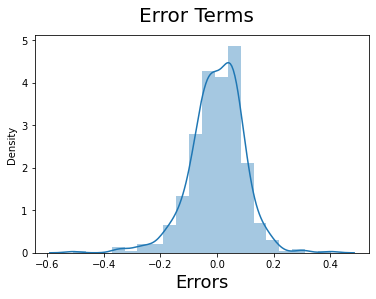

In [84]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

#####  from above graph, error terms are normally distributed

#### Test Data

In [85]:
#Create the test data frame for the continous variable.
bikedf_test[cont_var] = scaler.transform(bikedf_test[cont_var])

In [86]:
#Create target and independent variables.
y_bike_test = bikedf_test.pop('cnt')
X_bike_test = bikedf_test

In [87]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'mnth_Dec', 'mnth_Jan', 'mnth_Nov', 'mnth_Sep',
       'season_spring', 'season_summer', 'season_winter',
       'weathersit_Clear Day', 'weathersit_Rainy Day'],
      dtype='object')

In [88]:
X_test_new = X_bike_test[X_train_new.columns]

In [89]:
X_test_new = sm.add_constant(X_test_new)

In [90]:
X_test_new.shape, X_train_new.shape

((219, 13), (510, 12))

######  Model Evaluation
Let us evaluate the model using the assumptions:

Assumptions of linear regression
Error terms are normally distributed.
Error terms are independent of each other
Error terms have constant variance(homoscedasticity)

## Residual Analysis for Test Data:

In [91]:
#Predict for the test data set
y_pred = lm1.predict(X_test_new)

Text(0.5, 0, 'Errors')

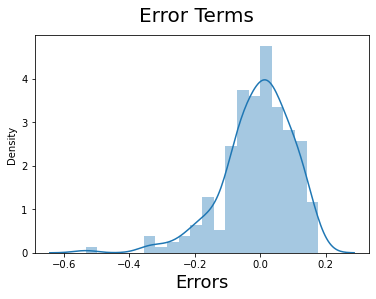

In [92]:
# Plot the histogram of the error terms for test data
fig = plt.figure()
sns.distplot((y_bike_test - y_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18) 

Text(0, 0.5, 'y_pred')

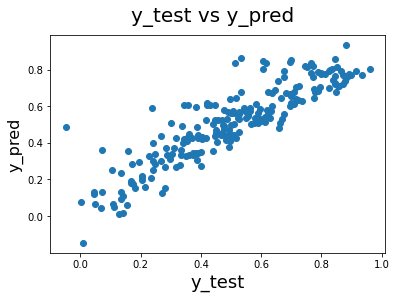

In [93]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_bike_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)  

###### Here we could see that the error terms have contant variance

###### Assumptions for Residual Analysis:

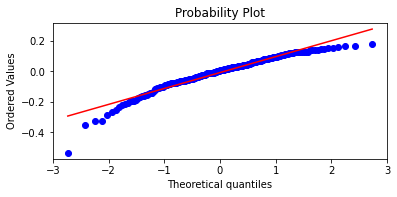

In [94]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
_, (__, ___, r) = sp.stats.probplot((y_bike_test - y_pred), plot=ax, fit=True)

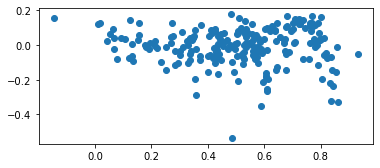

In [95]:
fig, ax = plt.subplots(figsize=(6,2.5))
_ = ax.scatter(y_pred, (y_bike_test - y_pred))

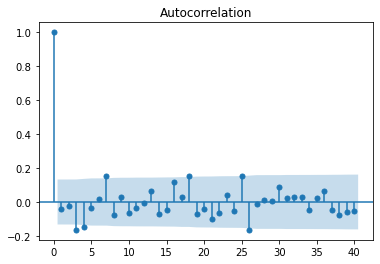

In [96]:
import statsmodels.tsa.api as smt
acf = smt.graphics.plot_acf((y_bike_test - y_pred), lags=40 , alpha=0.05)
acf.show()

###### Adjusted R^2 Value Formula:
Formula for Adjusted R^2:

R2adj=1−(1−R2)∗n−1n−p−1

###### R^2 value for train data set:

In [97]:
r2 = r2_score(y_train,y_train_pred)
print(r2)

0.8346541748639539


###### Adjusted R^2 value for train data:

In [98]:
#Adjusted R^2 for train data
# n is number of rows in X
n = X_train.shape[0]
# Number of features (predictors, p) is the shape along axis 1
p = X_train.shape[1]
# We find the Adjusted R-squared using the formula
adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.8246645312619845

###### R^2 value for test data set:

In [99]:
r2_test = r2_score(y_bike_test ,y_pred)
print(r2_test)

0.7888329504753651


###### Adjusted R^2 for test data:

In [100]:
#Adjusted R^2 for test data
# n is number of rows in X
n = X_test_new.shape[0]
p = X_test_new.shape[1]
adjusted_r2_test = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2_test

0.8241688298553266

##### ## Final Model:

We can see that the equation of our best fitted line is:

$ cnt = 0.0453 + (yr * 0.2449) + (holiday * (-0.0784)) + (temp * 0.4732) + (mnth_Dec * (-0.0694)) + (mnth_Jan * (-0.0341)) + (mnth_Nov * (-0.0875)) + (mnth_Sep * 0.0683)  + (season_spring * (-0.0747)) + (season_summer * 0.0419) + (season_winter * 0.141) + (weathersit_Clear Day * 0.0832) + (weathersit_Rainy Day * (-0.1787)) $

###### Conclusion:
Important factors that are significant in predicting the demand for shared bikes are:

temperature
windspeed
weathersit
holiday
month
Bike demands are high during the clear day with less attributing factors on the weather. The demand is high during fall and summer and during holidays. Also the demand rises from third quarter and fourth quarter and reduces next two quarters. So when the weather is pleasant people prefer to take the bikes and the demand is equal during workday or holiday mostly. When the weather is rainy/foggy, then the company can go in for the maintenance of the bikes. The demand is increasing slowly year over year. Company can roll out offers during Feb-Apr, to bring in more demand in the bikes.